# week7 notes

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.model_selection import train_test_split, KFold

In [70]:
df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx",)


In [71]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [72]:
# Rename columns for convenience
df.columns = ['No', 'date','age','dist','stores','lat','long','price']

In [73]:
# Perform test/train split at 80/20 because we do not have much training data
df_train,df_test = train_test_split(df, test_size=0.2, random_state=100)

In [74]:
df_train.shape,df_test.shape

((331, 8), (83, 8))

In [75]:
df_train.head(5)

,No,date,age,dist,stores,lat,long,price
272,273,2012.750000,13.0,492.2313,5,24.96515,121.53737,40.5
390,391,2013.500000,32.8,377.8302,9,24.97151,121.54350,38.6
69,70,2012.833333,12.5,561.9845,5,24.98746,121.54391,42.0
325,326,2013.083333,36.6,488.8193,8,24.97015,121.54494,38.1
199,200,2013.416667,18.2,451.6419,8,24.96945,121.54490,31.6


In [76]:
# only want ot transform numerical features
#drop price
features = ['date','age','dist','stores','lat','long']
numerical_features = ['date','age','dist','lat','long']
target = 'price'

In [77]:
# For PCA use StandardScaler, it is more robust to outliers
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error

**standard scaling: ** $X_scaled = X-Xmean / sd(X)$

minmax would set most of this close to zero
{1k, 10k, 1M, 55B} --> {0, 9k/55B, (1m-1k)/55B, 1}
standard scaler

**Fit the Poly transform**

In [78]:
# Adding bias creates a col 0 of constants (all ones) - AKA x_0
#   this impacts the Scaler - include manually afterwards
PF = PolynomialFeatures(degree=4, interaction_only=False, include_bias=False)

In [79]:
df_train_poly = PF.fit_transform(df_train[numerical_features])

**Fit the scaler**

In [80]:
std_scaler = StandardScaler()

In [81]:
df_train_scaled = std_scaler.fit_transform(df_train_poly)

**Create a version of df_train including constant bias**

In [82]:
df_train_scaled_const = np.hstack((np.ones((df_train_scaled.shape[0],1)), df_train_scaled))

**Check results**

In [83]:
df_train_scaled.shape,df_train_scaled_const.shape

((331, 125), (331, 126))

In [84]:
df_train_scaled_const[:,0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

**Fit and predict regression on training data**

In [85]:
lr = LinearRegression(fit_intercept=True)

In [86]:
lr.fit(X=df_train_scaled, y=df_train[target])

LinearRegression()

In [87]:
# Show calculated coefficients
#   Comparing with others' data, and w/ other methods
#   Prof had a manual calculation of the LR fit
#lr.coef_

In [88]:
lr_predict_train = lr.predict(df_train_scaled)

In [89]:
mean_squared_error(y_true=df_train[target], y_pred=lr_predict_train)

37.16358166889828

In [90]:
# Just another way to compare results
df_train[target].sum()

12438.900000000001

In [91]:
# INCOMPLETE - this was the start of an external statistical verification option
#from statsmodels.regression import linear_model
#stats_ols = linear_model.OLS()

**Plot actual vs. predicted on train set**

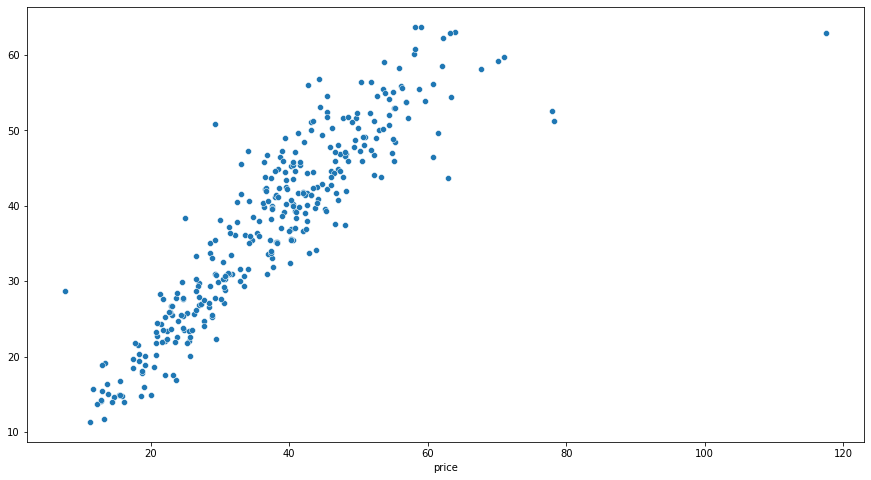

In [92]:
sns.scatterplot(x=df_train[target], y = lr_predict_train)

**Apply trained model to test data**

In [93]:
df_test_poly = PF.transform(df_test[numerical_features])
df_test_scaled = std_scaler.transform(df_test_poly)

In [94]:
lr_predict_test = lr.predict(df_test_scaled)

In [95]:
mean_squared_error(y_true=df_test[target], y_pred=lr_predict_test)

267.973706013903

**Plot actual vs. predicted on test set**

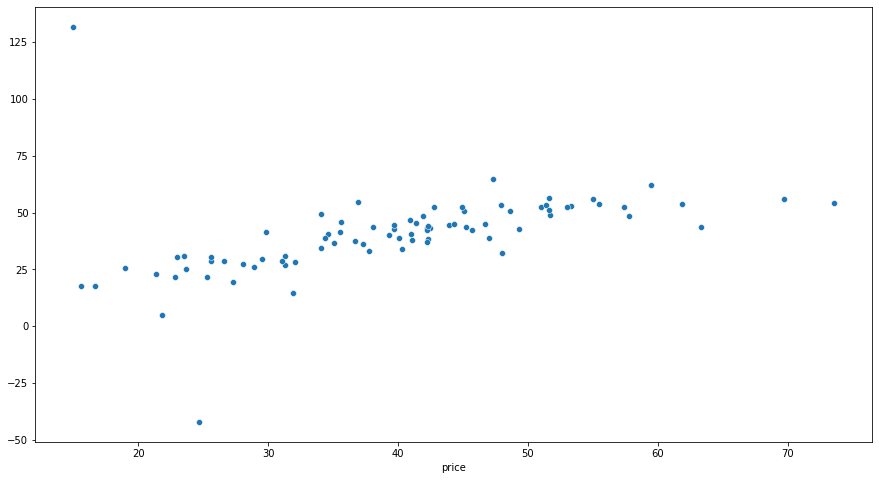

In [96]:
sns.scatterplot(x=df_test[target], y = lr_predict_test)

### Repeat LR using the added bias constants

**Fit and predict regression on training data**

In [97]:
lr = LinearRegression(fit_intercept=True)

In [98]:
lr.fit(X=df_train_scaled_const, y=df_train[target])

LinearRegression()

In [99]:
lr_predict_train = lr.predict(df_train_scaled_const)

In [100]:
mean_squared_error(y_true=df_train[target], y_pred=lr_predict_train)

38.30890410685467

**Plot actual vs. predicted on train set**

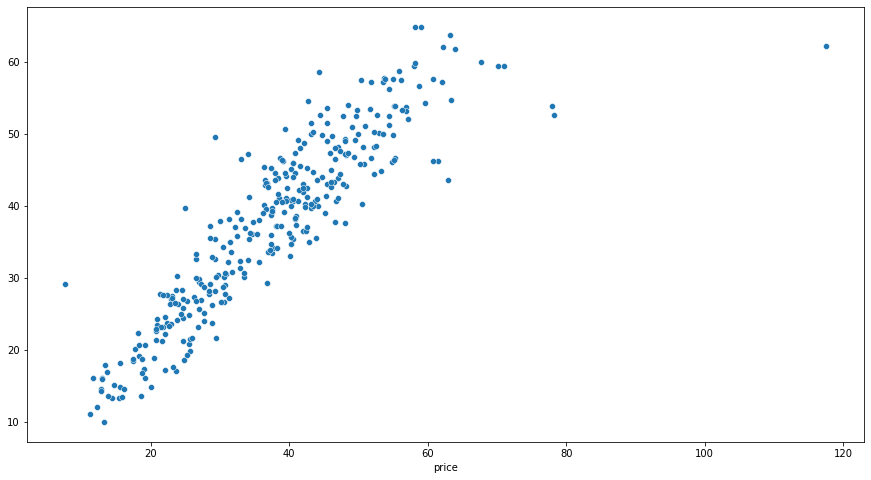

In [101]:
sns.scatterplot(x=df_train[target], y = lr_predict_train)

**Apply trained model to test data**

In [102]:
df_test_poly = PF.transform(df_test[numerical_features])
df_test_scaled = std_scaler.transform(df_test_poly)

**Create a version of df_test including constant bias**

In [103]:
df_test_scaled_const = np.hstack((np.ones((df_test_scaled.shape[0],1)), df_test_scaled))

In [104]:
lr_predict_test = lr.predict(df_test_scaled_const)

In [105]:
mean_squared_error(y_true=df_test[target], y_pred=lr_predict_test)

284.29100187370574

**Plot actual vs. predicted on test set**

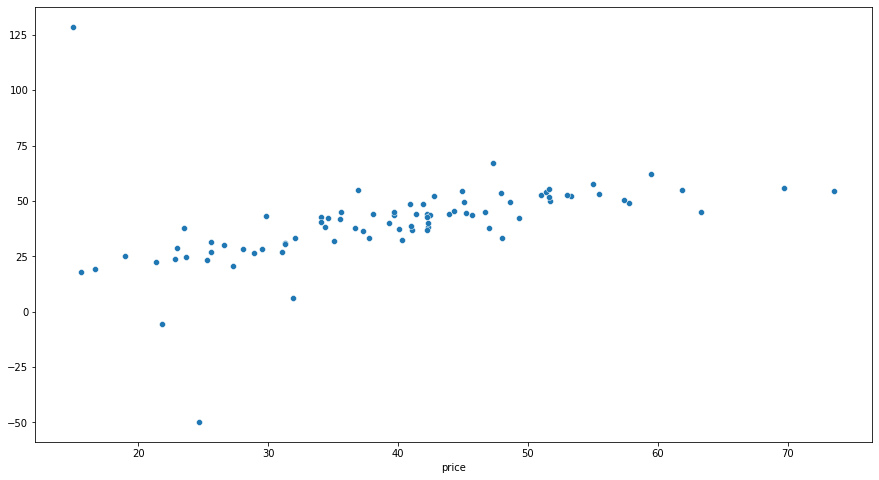

In [106]:
sns.scatterplot(x=df_test[target], y = lr_predict_test)

# LASSO

A linear model that estimates sparse coefficients.
[See this for a very good description.](https://scikit-learn.org/stable/modules/linear_model.html#lasso)

In [107]:
from sklearn.linear_model import lasso_path

**First - try lasso_path for low-level leveraging of the algorithm**

In [108]:
# Setting hyperparameters tunes how much to penalize beta
#    each alpha will provide a diff value per coeff
alphas, coefs, _ = lasso_path(X = df_train_scaled_const, y = df_train[target], alphas = [0,.1,.5,1,5,10])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10253.117994846078, tolerance: 53.12572900000001
  positive,


In [109]:
alphas

array([10. ,  5. ,  1. ,  0.5,  0.1,  0. ])

In [110]:
# Note the diff value per alpha per coeff
coefs.shape

(126, 6)

In [111]:
# Handy way to visualize the coefs 
pd.DataFrame(coefs, columns=alphas)

,10.0,5.0,1.0,0.5,0.1,0.0
0,27.579758,32.579758,36.579758,37.079758,37.479758,37.579758
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.002090
2,-0.000000,-0.000000,-1.665714,-2.136194,-2.420721,-2.426626
3,-0.000000,-2.659525,-0.693520,-0.631360,-0.794947,-0.656774
4,0.000000,0.000000,0.000000,0.000000,0.000000,-0.071451
...,...,...,...,...,...,...
121,0.000000,0.000000,0.000000,0.000000,0.000000,0.117743
122,0.000000,0.000000,0.000000,0.000000,0.000000,0.027541
123,0.000000,0.000000,0.000000,0.000000,0.000000,0.030478
124,0.000000,0.000000,0.000000,0.000000,0.000000,0.036574


**Plot convergence to zero**

In [112]:
from matplotlib import pyplot as plt
import itertools
# Globally making the plots larger 
plt.rcParams["figure.figsize"] = (15,8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


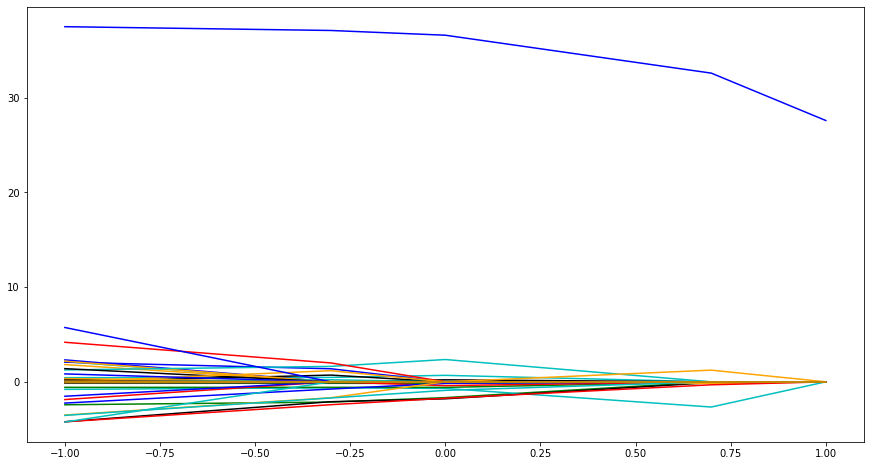

In [113]:
plt.figure(1)
colors = itertools.cycle(['b','r', 'g','c','k','orange'])
log_alphas_lasso = np.log10(alphas)
for coef_l,c in zip(coefs, colors):
  l1 = plt.plot(log_alphas_lasso, coef_l, c=c)

**Run again without the constants**

These were the largest values and impacted how the data was distributed.

In [114]:
alphas, coefs, _ = lasso_path(X = df_train_scaled, y = df_train[target], alphas = [0,.1,.5,1,5,10])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 243977.1541297263, tolerance: 53.12572900000001
  positive,


In [115]:
pd.DataFrame(coefs, columns=alphas)

,10.0,5.0,1.0,0.5,0.1,0.0
0,0.0,0.000000,0.000000,0.000000,0.000000,-0.010311
1,-0.0,-0.000000,-1.685049,-2.091756,-2.305049,-2.311146
2,-0.0,-1.221361,-1.009838,-0.000000,-0.000000,0.140119
3,0.0,0.000000,0.000000,0.000000,0.000000,-0.066769
4,0.0,0.000000,0.000000,0.000000,0.000000,0.203304
...,...,...,...,...,...,...
120,0.0,0.000000,0.000000,0.000000,0.000000,0.116578
121,0.0,0.000000,0.000000,0.000000,0.000000,0.027375
122,0.0,0.000000,0.000000,0.000000,0.000000,0.030477
123,0.0,0.000000,0.000000,0.000000,0.000000,0.037014


In [116]:
abs(pd.DataFrame(coefs, columns=alphas).mean(axis=1))

0      0.001718
1      1.398833
2      0.348513
3      0.011128
4      0.033884
         ...   
120    0.019430
121    0.004563
122    0.005080
123    0.006169
124    0.007160
Length: 125, dtype: float64

**Note:** The features with the most correlation to Y will remain above 0 longer.  Those crashing to zero quickly did not have much correlation.

*Keep your features with the strongest correlations.*

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


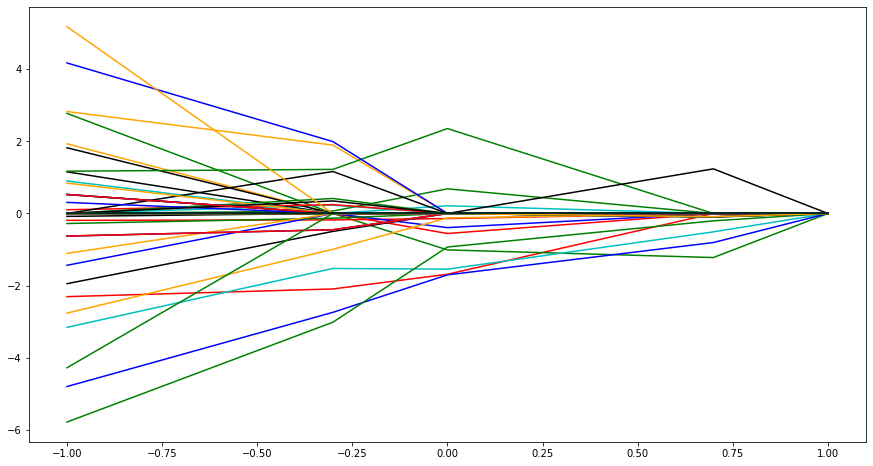

In [117]:
plt.figure(1)
colors = itertools.cycle(['b','r', 'g','c','k','orange'])
log_alphas_lasso = np.log10(alphas)
for coef_l,c in zip(coefs, colors):
  l1 = plt.plot(log_alphas_lasso, coef_l, c=c)

## Lasso Regressor

Linear Model trained with L1 prior as regularizer (aka the Lasso).

In [118]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import RandomizedSearchCV, KFold

In [119]:
lasso = Lasso()
alphas_grid = {'alpha':[.1,.5,1,10,.001]}
kfold_5 = KFold(5)

In [120]:
# Execute Cross-validator: Randomized search on hyper parameters.
#   this supports fit, score, transform, and predict
RandomizedSearchCV(estimator=lasso, param_distributions=alphas_grid, scoring=mean_squared_error, cv = kfold_5)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Lasso(),
                   param_distributions={'alpha': [0.1, 0.5, 1, 10, 0.001]},
                   scoring=<function mean_squared_error at 0x7f6003431ef0>)

**Ridge is very similar to Lasso**

The difference is the shape of the reduction/descent region - uses a circle

In [121]:
ridge = Ridge()

In [122]:
RandomizedSearchCV(estimator=ridge, param_distributions=alphas_grid, scoring=mean_squared_error, cv = kfold_5)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Ridge(),
                   param_distributions={'alpha': [0.1, 0.5, 1, 10, 0.001]},
                   scoring=<function mean_squared_error at 0x7f6003431ef0>)